# Hw2 Experimentation: Language Models

**Author**:Sam Showalter

**Date**:2021-04-13

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

## Module and Package Imports

In [65]:
from lm import *
from data import *
from generator import Sampler
from experiments import *

## Hyperparameter tuning experiments

In [5]:
# For bigram
ks = [1,0.5,0.1,0.05,0.01,0.005,0.001, 0.0005, 0.0001,0.00005,0.00001]
r = addk_ablation(2,ks)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199
gutenberg  read. train: 68767 dev: 14667 test: 14861
Unigram: brown
Unigram: reuters
Unigram: gutenberg


100%|██████████| 11/11 [01:04<00:00,  5.86s/it]


In [6]:
# For trigram
ks = [1,0.5,0.1,0.05,0.01,0.005,0.001, 0.0005, 0.0001,0.00005,0.00001]
r = addk_ablation(3,ks)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199
gutenberg  read. train: 68767 dev: 14667 test: 14861
Unigram: brown
Unigram: reuters
Unigram: gutenberg


100%|██████████| 11/11 [01:21<00:00,  7.44s/it]


In [7]:
#Backoff ablation with no add-k
ns = [2,3,4,5,6,7]
r = backoff_ablation(ns,None, r)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199


  0%|          | 0/6 [00:00<?, ?it/s]

gutenberg  read. train: 68767 dev: 14667 test: 14861
brown


  0%|          | 0/6 [00:00<?, ?it/s]

reuters


  0%|          | 0/6 [00:00<?, ?it/s]

gutenberg


100%|██████████| 6/6 [01:45<00:00, 17.55s/it]


## Plots of Hyperparameter tuning

### Add-k bigram

In [21]:
addk2 = None
with open("data/results/addk_ablation_2.pkl", "rb") as file:
    addk2 = pkl.load(file)
    
addk3 = None
with open("data/results/addk_ablation_3.pkl", "rb") as file:
    addk3 = pkl.load(file)

In [10]:
dnames = ['brown','reuters','gutenberg']

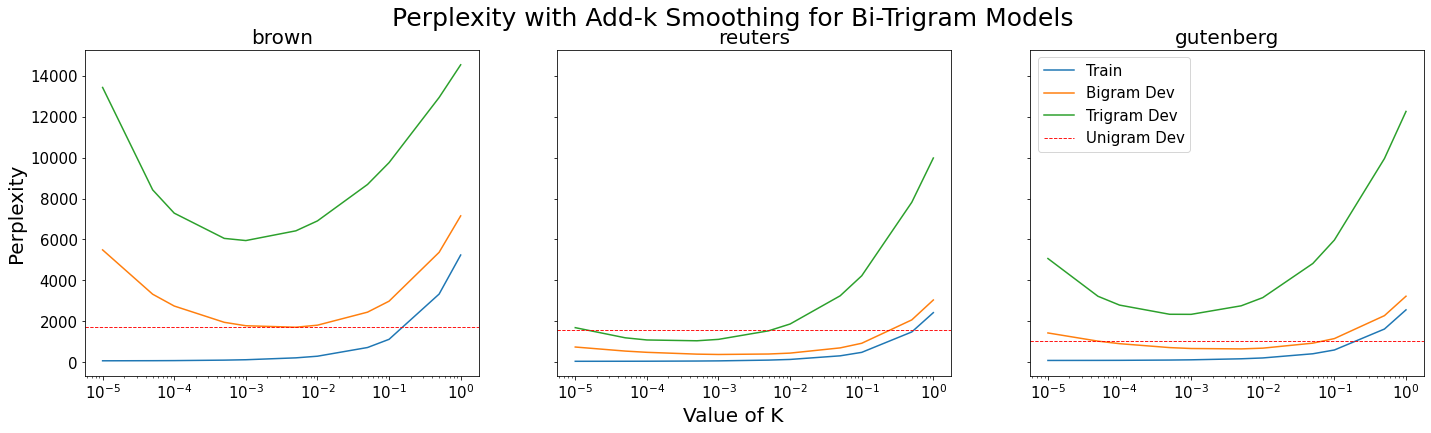

In [138]:
fig,ax = plt.subplots(1,3, figsize = (24,6),sharex = True, sharey = True)

for i,d in enumerate(dnames):
    bdev_perp = [addk2[d][2][i]['perplexity']['dev'] for i in ks]
    tdev_perp = [addk3[d][3][i]['perplexity']['dev'] for i in ks]
    train_perp = [addk2[d][2][i]['perplexity']['train'] for i in ks]
    unigram_train = addk2[d][1]['perplexity']['train']
    unigram_dev = addk2[d][1]['perplexity']['dev']
    if i == 0:
        ax[i].set_ylabel("Perplexity", fontsize = 20)
    ax[i].semilogx(ks, train_perp, label = "Train")
    ax[i].semilogx(ks, bdev_perp, label = "Bigram Dev")
    ax[i].semilogx(ks, tdev_perp, label = "Trigram Dev")
#     ax[i].axhline(unigram_train, label = "Unigram train",linestyle = 'dashed',linewidth = 0.9
#             , c = 'blue')
    ax[i].axhline(unigram_dev, label = "Unigram Dev",linestyle = 'dashed',linewidth = 0.9
            , c = 'red')
    ax[i].set_title(d, fontsize = 20)
plt.tick_params(axis = 'both',labelsize = 15)

plt.suptitle("Perplexity with Add-k Smoothing for Bi-Trigram Models",fontsize = 25)
fig.supxlabel("Value of K",fontsize = 20)
plt.legend(fontsize = 15)

### Add-k Trigram

In [12]:
addk = None
with open("data/results/addk_ablation_3.pkl", "rb") as file:
    addk = pkl.load(file)

In [13]:
dnames = ['brown','reuters','gutenberg']

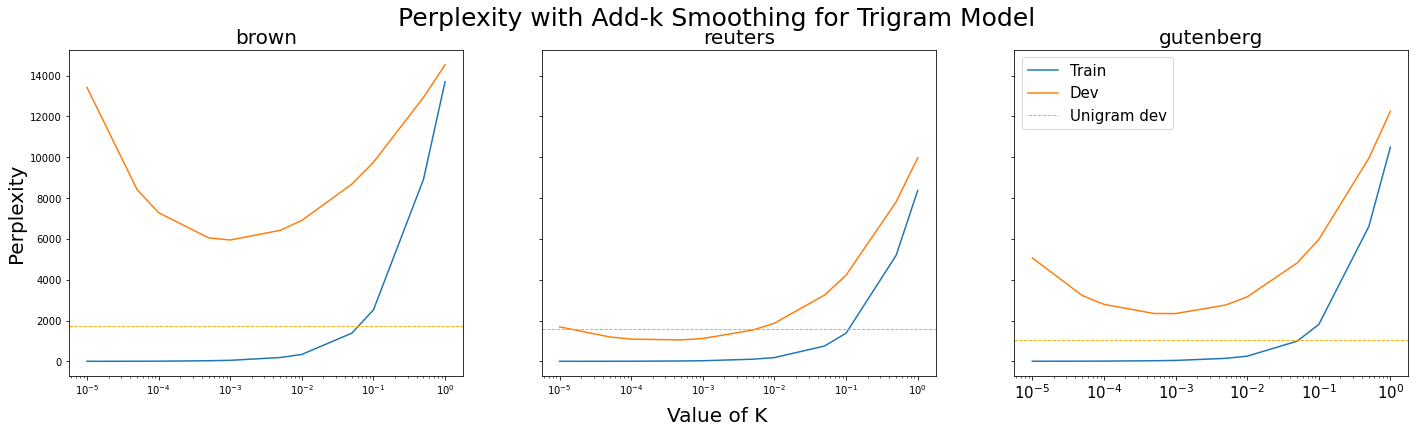

In [14]:
fig,ax = plt.subplots(1,3, figsize = (24,6),sharex = True, sharey = True)

for i,d in enumerate(dnames):
    dev_perp = [addk[d][3][i]['perplexity']['dev'] for i in ks]
    train_perp = [addk[d][3][i]['perplexity']['train'] for i in ks]
    unigram_train = addk[d][1]['perplexity']['train']
    unigram_dev = addk[d][1]['perplexity']['dev']
    if i == 0:
        ax[i].set_ylabel("Perplexity", fontsize = 20)
    ax[i].semilogx(ks, train_perp, label = "Train")
    ax[i].semilogx(ks, dev_perp, label = "Dev")
#     ax[i].axhline(unigram_train, label = "Unigram train",linestyle = 'dashed',linewidth = 0.9
#             , c = 'blue')
    ax[i].axhline(unigram_dev, label = "Unigram dev",linestyle = 'dashed',linewidth = 0.9
            , c = 'orange')
    ax[i].set_title(d, fontsize = 20)
plt.tick_params(axis = 'both',labelsize = 15)

plt.suptitle("Perplexity with Add-k Smoothing for Trigram Model",fontsize = 25)
fig.supxlabel("Value of K",fontsize = 20)
plt.legend(fontsize = 15)

### Backoff Plots

In [140]:
r = None
with open("data/results/backoff_ablation.pkl", "rb") as file:
    r = pkl.load(file)

In [16]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [141]:
r

{'brown': {1: {'perplexity': {'train': 1513.8018008490042,
    'dev': 1737.5445705338257,
    'test': 1758.248804766443}},
  3: {1: {'perplexity': {'train': 13701.171612112452,
     'dev': 14530.408751889301,
     'test': 14494.359026219534}},
   0.5: {'perplexity': {'train': 8919.829215707545,
     'dev': 12933.916034245001,
     'test': 12915.380354715597}},
   0.1: {'perplexity': {'train': 2523.9572574244653,
     'dev': 9753.576268195582,
     'test': 9772.637471939996}},
   0.05: {'perplexity': {'train': 1386.5125724444226,
     'dev': 8686.079973549282,
     'test': 8717.683838136792}},
   0.01: {'perplexity': {'train': 342.5639334289817,
     'dev': 6907.170620953843,
     'test': 6959.856505392535}},
   0.005: {'perplexity': {'train': 191.2106026633755,
     'dev': 6422.97070131712,
     'test': 6482.644699704734}},
   0.001: {'perplexity': {'train': 54.34309445679581,
     'dev': 5947.397683907655,
     'test': 6023.168575513985}},
   0.0005: {'perplexity': {'train': 33.531347

In [ ]:
train = []
test = []
dev = []
for i in range(2,6):
    data = r[i]['backoff']
    train.append(data['perplexity']['train'])
    dev.append(data['perplexity']['dev'])
    test.append(data['perplexity']['test'])

    

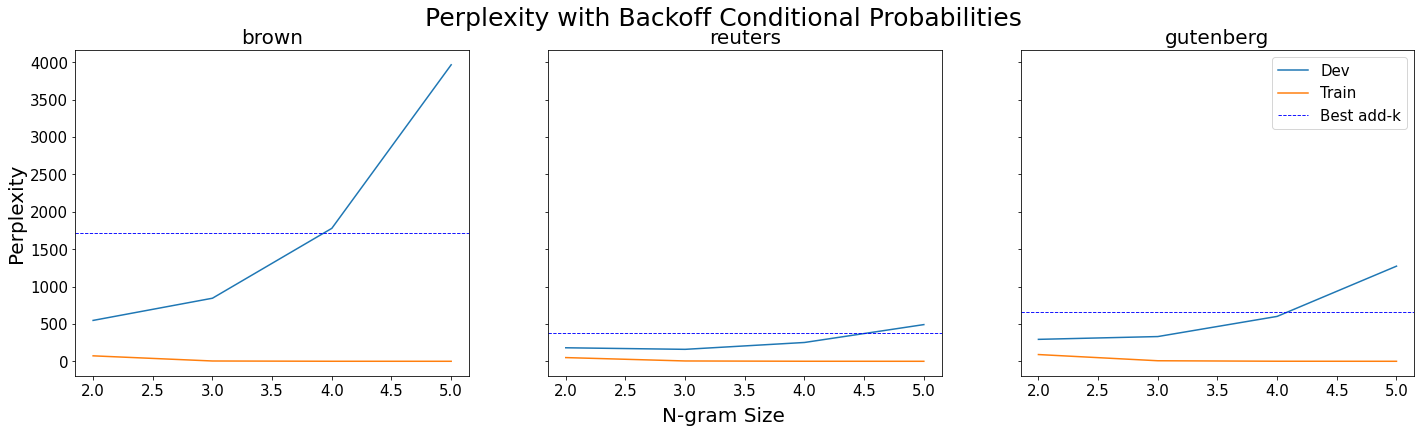

In [20]:
add_k_best_perf = [1715.467, 384.85, 657.5382256991614]
fig,ax = plt.subplots(1,3, figsize = (24,6),sharex = True, sharey = True)

for i,d in enumerate(dnames):
    backoff_dev_perp = [r[d][i]['backoff']['perplexity']['dev'] for i in ns if i <=5]
    backoff_train_perp = [r[d][i]['backoff']['perplexity']['train'] for i in ns if i <=5]
    if i == 0:
        ax[i].set_ylabel("Perplexity", fontsize = 20)
    ax[i].plot(ns[:4], backoff_dev_perp, label = "Dev")
    ax[i].plot(ns[:4], backoff_train_perp, label = "Train")
    ax[i].axhline(add_k_best_perf[i], label = "Best add-k",linestyle = 'dashed',linewidth = 0.9
            , c = 'blue')
    ax[i].set_title(d, fontsize = 20)
plt.tick_params(axis = 'both',labelsize = 15)

plt.suptitle("Perplexity with Backoff Conditional Probabilities",fontsize = 25)
fig.supxlabel("N-gram Size",fontsize = 20)
plt.legend(fontsize = 15)

# Sampling information

In [26]:
# !streamlit run demo.py
import pickle as pkl

In [54]:
with open("data/models/brown_best.pkl", "rb") as file:
    blm = pkl.load(file)
    
with open("data/models/reuters_best.pkl", "rb") as file:
    rlm = pkl.load(file)
    
with open("data/models/gutenberg_best.pkl", "rb") as file:
    glm = pkl.load(file)

blmb = Sampler(blm)
rlmb = Sampler(rlm)
glmb = Sampler(glm)

In [55]:
with open("data/models/brown_uni.pkl", "rb") as file:
    blmu = pkl.load(file)
    
with open("data/models/reuters_uni.pkl", "rb") as file:
    rlmu = pkl.load(file)
    
with open("data/models/gutenberg_uni.pkl", "rb") as file:
    glmu = pkl.load(file)

blmu = Sampler(blmu)
rlmu = Sampler(rlmu)
glmu = Sampler(glmu)

In [47]:
def sample_sentence_pref(model, sentence):
    s = sentence.split(" ")
    return " ".join(model.sample_sentence(prefix = s))

In [56]:
res_dict = {}
model_dict = {}
dnames = ['brown','reuters','gutenberg']
b_models = [blmb, rlmb, glmb]
u_models = [blmu, rlmu, glmu]

for i,d in enumerate(dnames):
    model_dict[d] = {}
    model_dict[d]['best'] = b_models[i]
    model_dict[d]['unigram'] = u_models[i]

In [121]:
prefixes = ['I am','The contract','Who hath','It is','The forecast']
res_dict = sampling_ablation(model_dict,prefixes)

I am -> brown | reuters | gutenberg | 
The contract -> brown | reuters | gutenberg | 
Who hath -> brown | reuters | gutenberg | 
It is -> brown | reuters | gutenberg | 
The forecast -> brown | reuters | gutenberg | 


In [123]:
with open("data/results/sentences.pkl","wb") as file:
    pkl.dump(res_dict, file)

In [122]:
res_dict

{'I am': {'brown': {'best': 'I am innocent',
   'unigram': 'I am misleads on tissue dirt productive next rang tell developed trees On the Fig scenes the know deloused club easy of also and they yelled distribution Gunny to able largely'},
  'reuters': {'best': 'I am fixed rate to unload No',
   'unigram': 'I am Bankers by would of however'},
  'gutenberg': {'best': 'I am their mouth',
   'unigram': 'I am shall LORD he has wherein each Queen fanned extreme in that it not yourself to Caes let convulsive speedily had engagement and the made fate seen'}},
 'The contract': {'brown': {'best': 'The contract for the order of glass from the having an Afghan and Cousin Ada sufficiently commonplace that had grown young man or even system marks fog mad foundation maximization being',
   'unigram': 'The contract of thing of the the'},
  'reuters': {'best': 'The contract company one ct per share data public offering to holders of French telecommunications strongly committed to buy Azzam said',
   'u

## Analysis on Out-of-Domain Text: Perplexity

In [124]:
sentences = {
   0: "This third quarter fiscal forecast for DOW Chemical is bearish according to financial analysts.",
   1: "Who hath such scuples as to remain untrodden by the perils of temptation.",
   2: "Hey did hear about that fight the football team got in to after practice?", 
   3: "Walked alone did she, on to tomorrow.",
    # Generated samples that score higher with model that generated them
    #Gutenberg
   4: "It was like fire sent them and new psychological influences set in stone brought the Holy Ghost",
    #Reuters
   5: "It was like the workforce body",
   6: "It was like a loss for Bahrain Oman and current residents are packing said company spokesman"
    
}

perp = perplexity_ablation(model_dict, sentences)

This third quarter fiscal forecast for DOW Chemical is bearish according to financial analysts
 -> brown | reuters | gutenberg | 
Who hath such scuples as to remain untrodden by the perils of temptation
 -> brown | reuters | gutenberg | 
Hey did hear about that fight the football team got in to after practice
 -> brown | reuters | gutenberg | 
Walked alone did she on to tomorrow
 -> brown | reuters | gutenberg | 
It was like fire sent them and new psychological influences set in stone brought the Holy Ghost
 -> brown | reuters | gutenberg | 
It was like the workforce body
 -> brown | reuters | gutenberg | 
It was like a loss for Bahrain Oman and current residents are packing said company spokesman
 -> brown | reuters | gutenberg | 


In [125]:
with open('data/results/perplexities.pkl','wb') as file:
    pkl.dump(perp, file)

In [126]:
perp

{0: {'brown': {'best': 6835.624052711349, 'unigram': 5268.02122645696},
  'reuters': {'best': 490.24203094635163, 'unigram': 1570.95925318655},
  'gutenberg': {'best': 4011.7873973405035, 'unigram': 6454.706101027245}},
 1: {'brown': {'best': 1900.8903697361627, 'unigram': 1996.65484218486},
  'reuters': {'best': 1764.7655839492595, 'unigram': 2669.905430002739},
  'gutenberg': {'best': 518.6680159153786, 'unigram': 1324.666962392162}},
 2: {'brown': {'best': 621.185355965856, 'unigram': 1081.3039916223538},
  'reuters': {'best': 5685.330421763136, 'unigram': 2628.3548124547615},
  'gutenberg': {'best': 2093.767502058306, 'unigram': 1572.4759837859099}},
 3: {'brown': {'best': 1010.8994159762935, 'unigram': 686.9094544775267},
  'reuters': {'best': 1352.5445241019656, 'unigram': 1334.0023590051696},
  'gutenberg': {'best': 1883.983395841998, 'unigram': 1473.2271173003905}},
 4: {'brown': {'best': 1270.2787099255431, 'unigram': 1663.3368857825915},
  'reuters': {'best': 2295.80914415210

In [132]:
from tabulate import tabulate

In [136]:
rows = []
for s in perp:
    row = [s] 
    for d in dnames:
        row.append("{} / {}".format(round(perp[s][d]['best']),
                                 round(perp[s][d]['unigram'])))
    rows.append(row)
print(rows) 

[[0, '6836 / 5268', '490 / 1571', '4012 / 6455'], [1, '1901 / 1997', '1765 / 2670', '519 / 1325'], [2, '621 / 1081', '5685 / 2628', '2094 / 1572'], [3, '1011 / 687', '1353 / 1334', '1884 / 1473'], [4, '1270 / 1663', '2296 / 2656', '124 / 1271'], [5, '110 / 335', '245 / 882', '111 / 361'], [6, '1498 / 2288', '846 / 1430', '3863 / 4466']]


In [137]:
latex_file = "data/results/perp.tex"
latex_str = tabulate(rows, headers = [""] +  dnames, tablefmt="latex") 
with open(latex_file, 'w') as f:  
    f.write(latex_str)
    f.close()

### Table for in-domain

In [ ]:

 1513.8  &  17443.5  &    2459.17  \\
 reuters   & 7216.01 &   1466.87 &   12016.8   \\
 gutenberg & 4130.09 &  44906    &     981.369 \\

In [143]:
add_k_best_train = [127.561,72.4294,123.74]
add_k_best_test = [1822.19,378.492,649.978 ]
backoff_best_train = [74.6185,51.223,91.8805]
backoff_best_test = [558.59,180.312,285.342]
unigram_best_test = [1758.25,1576.85,1035.78]
unigram_best_train = [1513.8,1466.87,981.369]

In [153]:
id_dict = {}
trows = ['unigram','add-k','backoff']
id_dict['unigram'] = list(zip(unigram_best_train, unigram_best_test))
id_dict['add-k'] = list(zip(add_k_best_train, add_k_best_test))
id_dict['backoff'] = list(zip(backoff_best_train, backoff_best_test))

In [154]:
id_dict

{'unigram': [(1513.8, 1758.25), (1466.87, 1576.85), (981.369, 1035.78)],
 'add-k': [(127.561, 1822.19), (72.4294, 378.492), (123.74, 649.978)],
 'backoff': [(74.6185, 558.59), (51.223, 180.312), (91.8805, 285.342)]}

In [155]:
rows = []

for t in trows:
    row = [t] + ['{} / {}'.format(round(id_dict[t][i][0]),
                                  round(id_dict[t][i][1])) for i in range(3)]
    rows.append(row)
latex_file = "data/results/in-domain.tex"
latex_str = tabulate(rows, headers = [""] +  dnames, tablefmt="latex") 
with open(latex_file, 'w') as f:  
    f.write(latex_str)
    f.close()
    

### Table for appendix sentences

In [157]:
rows = []
for i,s in sentences.items():
    rows.append([i,s])

latex_file = "data/results/sent_appendix.tex"
latex_str = tabulate(rows, headers = ["index","sentence"], tablefmt="latex") 
with open(latex_file, 'w') as f:  
    f.write(latex_str)
    f.close()